INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_74e280b79f7cca6d14998a3010ebc0b4 NOW.


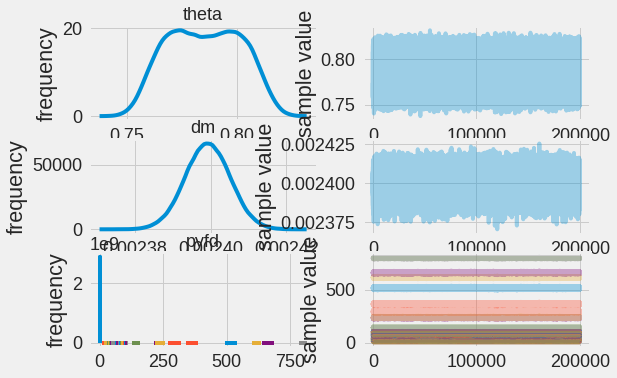

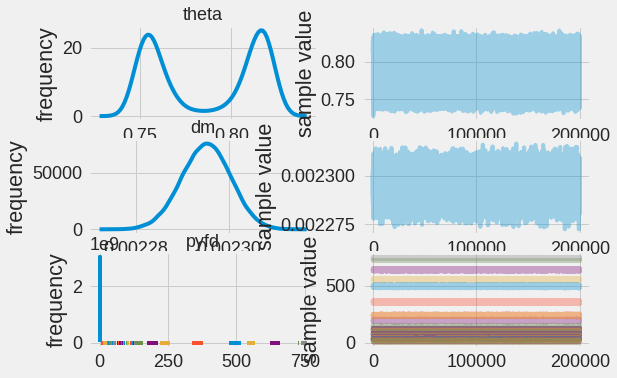

In [1]:
%matplotlib inline

import pystan
import pystan_tools as pst
import smearing_tools as st
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
import seaborn as sns
import numpy as np
from math import *
mpl.style.use('fivethirtyeight')
mpl.rc('font', size=18)
mpl.rc('axes', titlesize=18)
mpl.rc('legend', fontsize=18)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)


#Ebins=[0.5,1.5,2.5,3.5,4.5]
#ynd=[500,500,500,500]
#smearingA=st.smearingA(Ebins,0.05)
#smearingB=st.smearingB(Ebins,0.05,0.2)
#smearingB=st.smearingA(Ebins,0.05)
#nu_dat = {'L':1300, 'Nbins':4, 
#          'Ebins':Ebins,
#          'ynd':ynd,
#          'ttheta':0.7854, 'tdm':2.4e-3, 'Sa':smearingA.tolist(), 'Sb':smearingB.tolist()}

Ebins=[0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1,1.125,1.25,1.375,1.5,1.625,1.75,1.875,2,2.125,2.25,2.375,2.5,2.625,2.75,2.875,3,3.125,3.25,3.375,3.5,3.625,3.75,3.875,4,4.125,4.25,4.375,4.5,4.625,4.75,4.875,5,5.125,5.25,5.375,5.5,5.625,5.75,5.875,6,6.125,6.25,6.375,6.5,6.625,6.75,6.875,7,7.125,7.25,7.375,7.5,7.625,7.75,7.875,8]
ynd=[1e-9,0.0186176,0.0865335,0.735213,156.83,401.622,425.576,547.128,671.816,737.864,831.819,859.423,888.056,911.318,940.432,958.79,963.343,985.975,974.608,995.774,979.917,941.153,907.552,865.736,797.247,729.36,659.869,582.71,519.115,455.485,401.686,351.107,297.258,258.408,220.897,188.965,167.309,143.047,122.778,109.995,100.715,89.8686,80.9079,71.9916,65.7639,62.5326,55.6679,52.9838,48.7261,46.6036,43.136,42.8935,41.0557,38.3422,37.0935,36.9174,36.254,35.7731,34.8589,34.7187,33.8421,34.8576,33.4684,33.24]
smearingA=st.smearingA(Ebins,0.05)
smearingB=st.smearingB(Ebins,0.05,0.05)
#smearingA=st.asmearing(Ebins,0.05,0.)
#smearingB=st.asmearing(Ebins,0.05,0.009)

nu_datAA = {'L':1300, 'Nbins':len(ynd), 
          'Ebins':Ebins,
          'ynd':ynd,
          'ttheta':0.7854, 'tdm':2.4e-3, 'Sa':smearingB.tolist(), 'Sb':smearingB.tolist()}

nu_datAB = {'L':1300, 'Nbins':len(ynd), 
          'Ebins':Ebins,
          'ynd':ynd,
          'ttheta':0.7854, 'tdm':2.4e-3, 'Sa':smearingB.tolist(), 'Sb':smearingA.tolist()}

sm= pst.compile_model('model.stan')
fitA = sm.sampling(data=nu_datAA, iter=100000, chains=4)
fitA.plot()
fitB = sm.sampling(data=nu_datAB, iter=100000, chains=4)
fitB.plot()

fitAp=fitA.extract()
fitBp=fitB.extract()

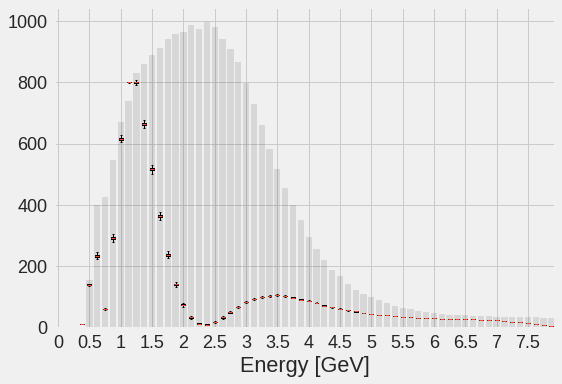

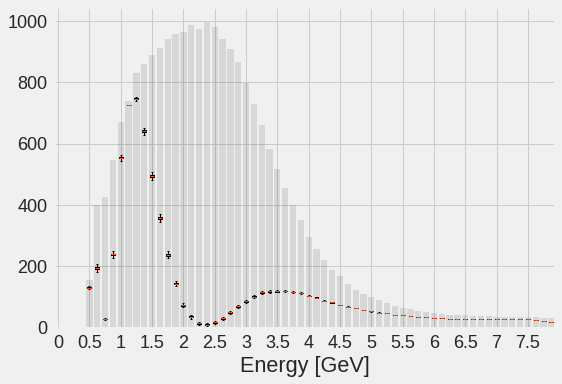

In [2]:

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.bar(np.arange(len(ynd)),ynd, color='black', alpha=0.1)
positions=[i for i in range(len(ynd))]
axes.boxplot(fitAp['pyfd'], positions=positions)
plt.setp(axes, xticks=range(len(ynd))[0::4], xticklabels=Ebins[0::4])
plt.xlabel('Energy [GeV]')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.bar(np.arange(len(ynd)),ynd, color='black', alpha=0.1)
positions=[i for i in range(len(ynd))]
axes.boxplot(fitBp['pyfd'], positions=positions)
plt.setp(axes, xticks=range(len(ynd))[0::4], xticklabels=Ebins[0::4])
plt.xlabel('Energy [GeV]')
plt.show()

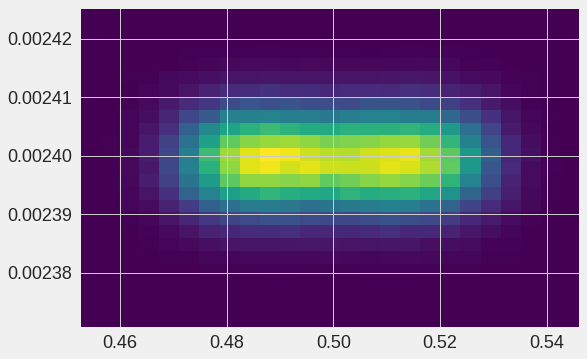

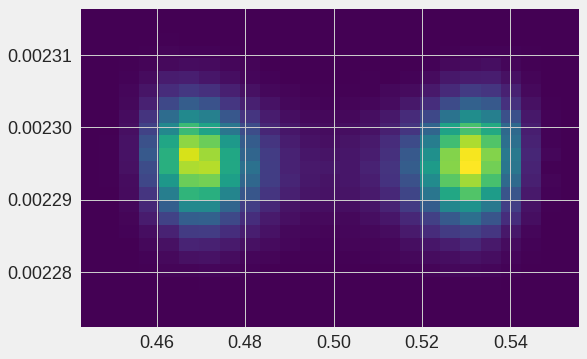

In [3]:
countsA,ybinsA,xbinsA,imageA=plt.hist2d([pow(sin(t),2) for t in fitAp['theta']],fitAp['dm'], bins=25, normed=True, cmap='viridis')
plt.show()
countsB,ybinsB,xbinsB,imageB=plt.hist2d([pow(sin(t),2) for t in fitBp['theta']],fitBp['dm'], bins=25, normed=True, cmap='viridis')
plt.show()



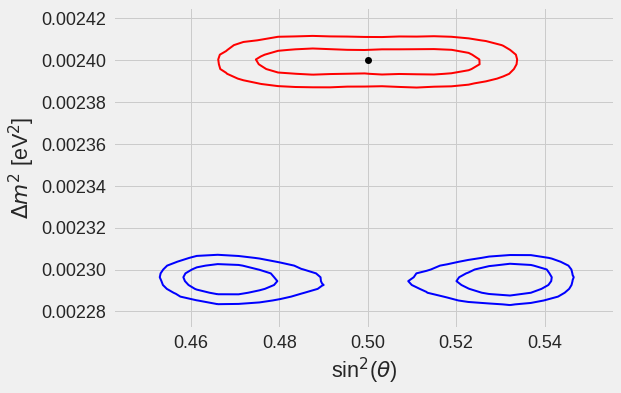

In [4]:
plt.ylabel('$\Delta m^2$ [eV$^2$]')
plt.xlabel('sin$^2$($\\theta$)')
levels=(1,4)
counts_normA=countsA/float(fitAp['theta'].shape[0])
plt.contour(counts_normA.transpose(),extent=[ybinsA.min(),ybinsA.max(),xbinsA.min(),xbinsA.max()],linewidths=2, colors=('r', 'r'), levels=levels)
counts_normB=countsB/float(fitBp['theta'].shape[0])
plt.contour(counts_normB.transpose(),extent=[ybinsB.min(),ybinsB.max(),xbinsB.min(),xbinsB.max()],linewidths=2, colors=('b', 'b'), levels=levels)

#Add true point
plt.plot(0.5,2.4e-3,'ro', color='black', label='True Point') 


#plt.legend(loc='lower right')
plt.show()

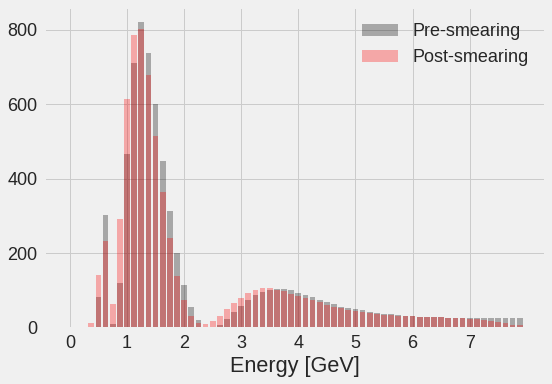

Pre-smearing event total: 7138.271385650715
Post-smearing event total: 7138.271689560709


In [5]:

a=[7.1193e-10,0.00795545,0.0854272,0.640129,82.2271,302.571,11.4005,119.293,465.276,710.114,819.374,738.122,600.233,448.273,313.367,200.004,113.497,55.9774,19.7047,2.98776,0.587784,8.72173,23.5937,41.9313,59.603,75.5559,88.3453,96.0625,101.712,103.258,103.175,100.484,93.51,88.3531,81.3251,74.3181,69.8195,62.9735,56.7331,53.1155,50.6296,46.8714,43.6493,40.0676,37.6694,36.7847,33.5651,32.6885,30.7113,29.9655,28.258,28.5941,27.8209,26.3848,25.8975,26.1281,25.9904,25.9587,25.587,25.7621,25.3712,26.3885,25.5724,25.6222]
b=[7.1193e-10,0.00817756,0.119452,12.8329,141.453,233.168,62.8444,290.911,614.328,786.51,802.169,676.866,515.786,364.915,240.973,139.978,73.7728,32.3604,13.2269,10.1268,17.9497,32.4578,50.0324,65.704,80.5357,94.6072,100.331,106.431,106.623,101.581,98.0078,91.7442,85.6131,78.9037,74.1395,68.1845,61.529,56.6752,52.6713,48.4112,45.454,42.8993,40.6393,38.2852,35.4496,34.0632,32.6074,31.3825,30.4316,29.8251,28.8995,28.4682,27.7374,27.3594,26.5912,25.9195,24.5227,22.4836,20.7337,17.9114,14.7291,11.9818,8.84108,6.57478]

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.bar(np.arange(len(a)),a, color='black', alpha=0.3, label='Pre-smearing')
plt.bar(np.arange(len(b)),b, color='red', alpha=0.3, label='Post-smearing')
plt.setp(axes, xticks=range(len(ynd))[0::8], xticklabels=Ebins[0::8])
plt.xlabel('Energy [GeV]')
plt.legend()
plt.show()


print("Pre-smearing event total:",sum(a))
print("Post-smearing event total:", sum(b))

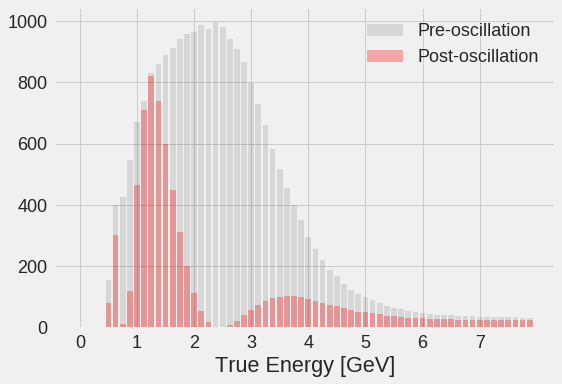

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.bar(np.arange(len(ynd)),ynd, color='black', alpha=0.1, label='Pre-oscillation')
plt.bar(np.arange(len(a)),a, color='red', alpha=0.3, label='Post-oscillation')
plt.setp(axes, xticks=range(len(ynd))[0::8], xticklabels=Ebins[0::8])
plt.xlabel('True Energy [GeV]')
plt.legend()
plt.show()